In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [5]:
release_dates = pd.DataFrame.from_csv('data/release_dates.csv', index_col=None,
                                      parse_dates=['date'], infer_datetime_format=True)
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Declimax,2018,Netherlands,2018-01-21
3,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
4,#Horror,2015,USA,2015-11-20


### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

In [6]:
t=release_dates[release_dates.title.str.contains('Christmas')]
t.head()

,title,year,country,date
1182,12 Dog Days of Christmas,2014,USA,2014-11-28
1183,12 Dogs of Christmas: Great Puppy Rescue,2012,USA,2012-10-09
5873,A Belle for Christmas,2014,USA,2014-11-04
5874,A Belle for Christmas,2014,France,2014-12-26
6094,A Bulldog for Christmas,2013,UK,2014-11-03


In [8]:
t=release_dates[release_dates.title.str.contains('Christmas')]
v=t[t.country='USA'].head()

SyntaxError: invalid syntax (<ipython-input-8-809d627cb8b4>, line 2)

In [14]:
t=release_dates[release_dates.title.str.contains('Christmas')]
v=t[t.country=='USA']
v.head()
v.date.dt.month.value_counts().sort_index()

1      2
2      1
4      1
5      1
6      1
7      1
8      2
9      2
10    14
11    38
12    48
Name: date, dtype: int64

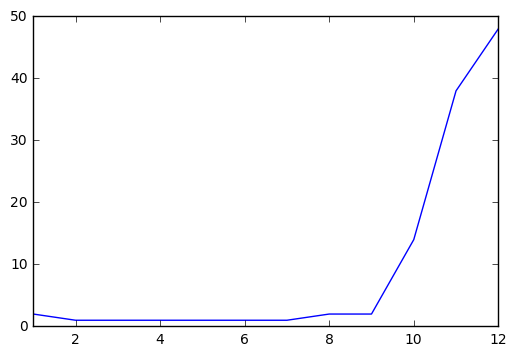

In [15]:
v.date.dt.month.value_counts().sort_index().plot()

### Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

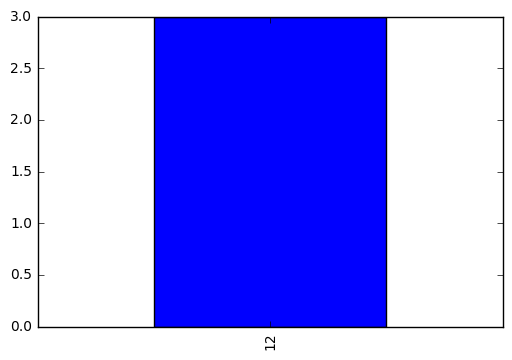

In [16]:
t=release_dates[release_dates.title.str.startswith('The Hobbit')]
v=t[t.country=='USA']
v.head()
v.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

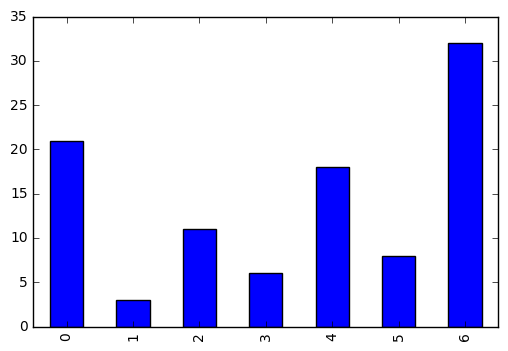

In [17]:
t=release_dates[release_dates.title.str.contains('Romance')]
v=t[t.country=='USA']
v.date.dt.dayofweek.value_counts().sort_index().plot(kind='bar')

### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

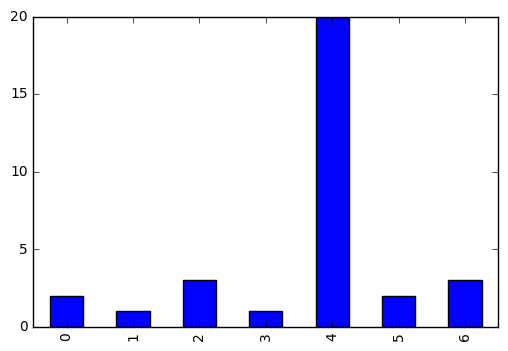

In [18]:
t=release_dates[release_dates.title.str.contains('Action')]
v=t[t.country=='USA']
v.date.dt.dayofweek.value_counts().sort_index().plot(kind='bar')

### On which date was each Judi Dench movie from the 1990s released in the USA?

In [19]:
c=cast()

TypeError: 'DataFrame' object is not callable

In [23]:
c=cast

In [6]:
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [7]:
c = cast[cast.name == 'Judy Dench']

In [9]:
usa = release_dates[release_dates.country=='USA']

In [10]:
c=c[c.year//10 == 199]
c.head()

,title,year,name,type,character,n


In [11]:
c=c[c.year//10 * 10 == 199]
c.head()

,title,year,name,type,character,n


In [14]:
c = cast[cast.name == 'Judi Dench']
c=c[c.year//10 == 199]
c.head()

,title,year,name,type,character,n
2703467,GoldenEye,1995,Judi Dench,actress,M,6.0
2703468,Hamlet,1996,Judi Dench,actress,Hecuba,12.0
2703474,Jack & Sarah,1995,Judi Dench,actress,Margaret,3.0
2703480,Mrs Brown,1997,Judi Dench,actress,Queen Victoria,1.0
2703493,Shakespeare in Love,1998,Judi Dench,actress,Queen Elizabeth,12.0


In [15]:
m=c.merge(usa)
m.head()

,title,year,name,type,character,n,country,date
0,GoldenEye,1995,Judi Dench,actress,M,6.0,USA,1995-11-17
1,Hamlet,1996,Judi Dench,actress,Hecuba,12.0,USA,1996-12-25
2,Jack & Sarah,1995,Judi Dench,actress,Margaret,3.0,USA,1996-03-22
3,Mrs Brown,1997,Judi Dench,actress,Queen Victoria,1.0,USA,1997-10-03
4,Shakespeare in Love,1998,Judi Dench,actress,Queen Elizabeth,12.0,USA,1999-01-08


In [16]:
m.sort(date)

NameError: name 'date' is not defined

In [17]:
k=m.sort('date')

C:\Users\Mathew\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [18]:
k

,title,year,name,type,character,n,country,date
0,GoldenEye,1995,Judi Dench,actress,M,6.0,USA,1995-11-17
2,Jack & Sarah,1995,Judi Dench,actress,Margaret,3.0,USA,1996-03-22
1,Hamlet,1996,Judi Dench,actress,Hecuba,12.0,USA,1996-12-25
3,Mrs Brown,1997,Judi Dench,actress,Queen Victoria,1.0,USA,1997-10-03
7,Tomorrow Never Dies,1997,Judi Dench,actress,M,9.0,USA,1997-12-19
4,Shakespeare in Love,1998,Judi Dench,actress,Queen Elizabeth,12.0,USA,1999-01-08
5,Tea with Mussolini,1999,Judi Dench,actress,Arabella,2.0,USA,1999-05-14
6,The World Is Not Enough,1999,Judi Dench,actress,M,6.0,USA,1999-11-19


### In which months do films with Judi Dench tend to be released in the USA?

In [12]:
c = cast[cast.name == 'Judy Dench']

In [13]:
c.head()

,title,year,name,type,character,n


In [ ]:
c = cast[cast.name == 'Judi Dench']

In [19]:
m=c.merge(usa)

In [20]:
m.head()

,title,year,name,type,character,n,country,date
0,GoldenEye,1995,Judi Dench,actress,M,6.0,USA,1995-11-17
1,Hamlet,1996,Judi Dench,actress,Hecuba,12.0,USA,1996-12-25
2,Jack & Sarah,1995,Judi Dench,actress,Margaret,3.0,USA,1996-03-22
3,Mrs Brown,1997,Judi Dench,actress,Queen Victoria,1.0,USA,1997-10-03
4,Shakespeare in Love,1998,Judi Dench,actress,Queen Elizabeth,12.0,USA,1999-01-08


In [21]:
m.date.dt.month.value_counts()

12    2
11    2
5     1
3     1
10    1
1     1
Name: date, dtype: int64

### In which months do films with Tom Cruise tend to be released in the USA?

In [ ]:
c = cast[cast.name == 'Tom Cruse']

In [22]:
m=c.merge(usa)

In [23]:
m.date.dt.month.value_counts().sort_index()

1     1
3     1
5     1
10    1
11    2
12    2
Name: date, dtype: int64